In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import pandas as pd

seed=1337
np.random.seed(seed)

# load dataset
from keras.datasets import reuters

max_words = 1000

(x_train,y_train), (x_test,y_test)=reuters.load_data(num_words=max_words,test_split=0.2,seed=seed)

num_classes =np.max(y_train)+1
print(num_classes, 'classes')


Using TensorFlow backend.


46 classes


In [2]:
# Vectorizing sequence data
tokenizer =Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [3]:
# Convert class vector to binary class matrix
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [4]:
# Building keras model
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                23598     
Total params: 536,110
Trainable params: 536,110
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compiling the keras model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from keras import backend as K

K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

In [7]:
# Fitting the keras model
batch_size=32
epochs=3
history=model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 8083 samples, validate on 899 samples
Epoch 1/3
8083/8083 [==============================] - 10s 1ms/step - loss: 1.4408 - acc: 0.6802 - val_loss: 0.9698 - val_acc: 0.7875
Epoch 2/3
8083/8083 [==============================] - 10s 1ms/step - loss: 0.7834 - acc: 0.8209 - val_loss: 0.8513 - val_acc: 0.8109
Epoch 3/3
8083/8083 [==============================] - 10s 1ms/step - loss: 0.5516 - acc: 0.8718 - val_loss: 0.8194 - val_acc: 0.8098


In [8]:
# Evaluate the keras model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)

print('score:',score[1]*100,'%')


2246/2246 [==============================] - 1s 285us/step
score: 80.45414069987574 %


In [9]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


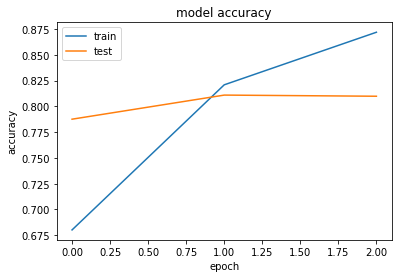

In [10]:
# list all data in history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


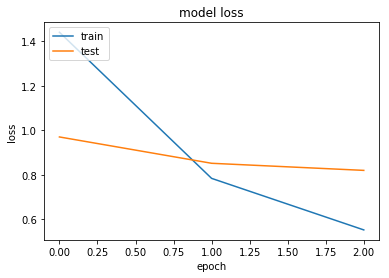

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# Keras model serialisation
# upload this file to the grader in the next code block
model.save('model.h5')

In [13]:
#To upload the exported model to the grader we first need to encode it based64, we are doing this using a shell command:
!base64 model.h5 > model.h5.base64

In [14]:
# convert the history.history dictionary to a pandas dataframe:     
hist_df = pd.DataFrame(history.history) 

# checkout result with print e.g.:    
print(hist_df)

# or the describe() method:
#hist_df.describe()

   val_loss   val_acc      loss       acc
0  0.969766  0.787542  1.440816  0.680193
1  0.851318  0.810901  0.783447  0.820859
2  0.819392  0.809789  0.551551  0.871830


In [15]:
summary=pd.DataFrame(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                23598     
Total params: 536,110
Trainable params: 536,110
Non-trainable params: 0
_________________________________________________________________


In [17]:
summary.to_html('summary0.html')

In [18]:
hist_df.to_html('history0.html')